In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [123]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [23]:
df['overweight'] = (df['weight'] / ((df['height'] * 0.01) ** 2) > 25).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [28]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


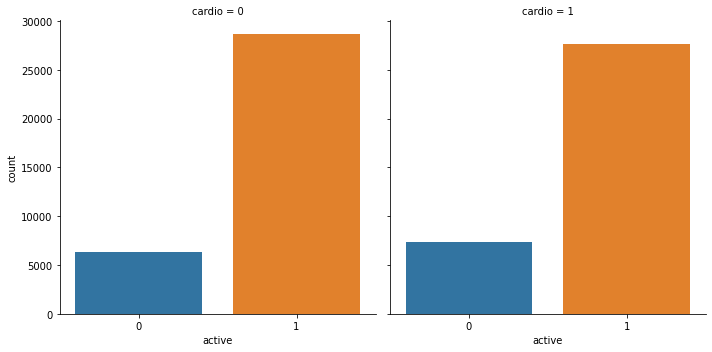

In [43]:
g = sns.catplot(x='active', data=df, col='cardio', kind='count')

In [79]:
meltedData = pd.melt(df, id_vars=['cardio'], value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
groupedData = meltedData.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
groupedData.rename(columns={'value': 'total'}, inplace=True)
groupedData.reset_index(inplace=True)
groupedData

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


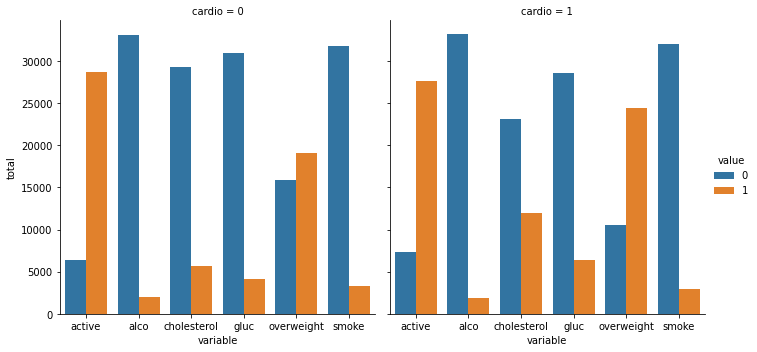

In [87]:
sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=groupedData)

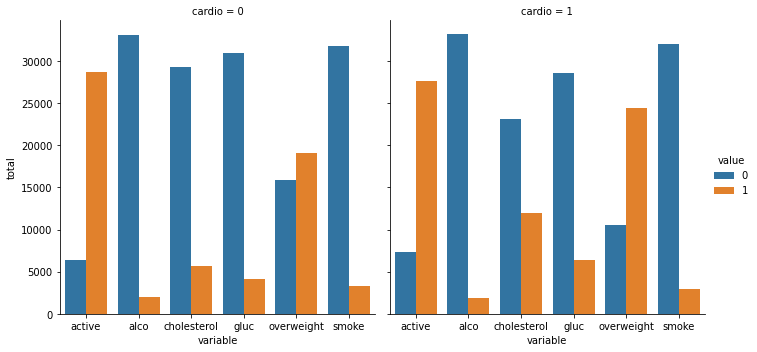

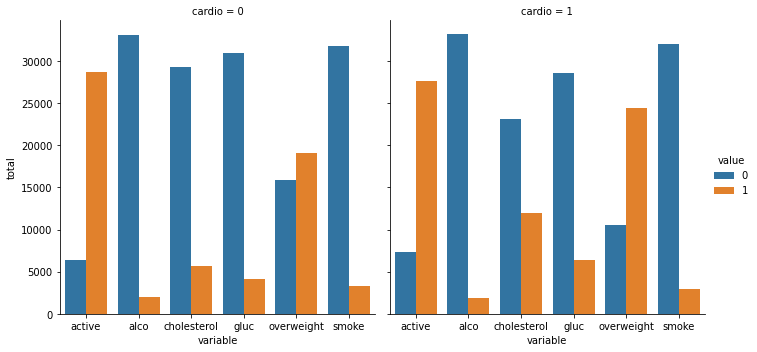

In [91]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
df_cat.rename(columns={'value': 'total'}, inplace=True)
df_cat.reset_index(inplace=True)

# Draw the catplot with 'sns.catplot()'
catplot = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat)


In [92]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [122]:
(df['ap_lo'] <= df['ap_hi'])

0        True
1        True
2        True
3        True
4        True
         ... 
69995    True
69996    True
69997    True
69998    True
69999    True
Length: 68766, dtype: bool

In [124]:
df.index

RangeIndex(start=0, stop=70000, step=1)

In [125]:
df_heat = df[df['ap_lo'] <= df['ap_hi']]

In [129]:
df_heat.shape[0]

68766

In [130]:
df_heat = df_heat[df_heat['height'] > df['height'].quantile(0.025)]
df_heat = df_heat[df_heat['height'] < df['height'].quantile(0.975)]
df_heat = df_heat[df_heat['weight'] > df['weight'].quantile(0.025)]
df_heat = df_heat[df_heat['weight'] < df['weight'].quantile(0.975)]

In [131]:
df_heat.shape[0]

61204

In [163]:
corr = df_heat.corr()
# corr.round(1)
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.005581,0.002242,-0.002732,-0.000708,0.005891,0.003900
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345


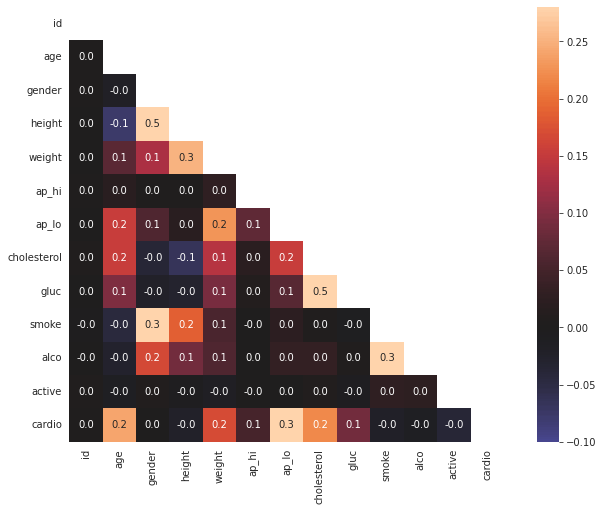

In [187]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt=".1f", center=0.0, vmin=-0.1, vmax=0.28)

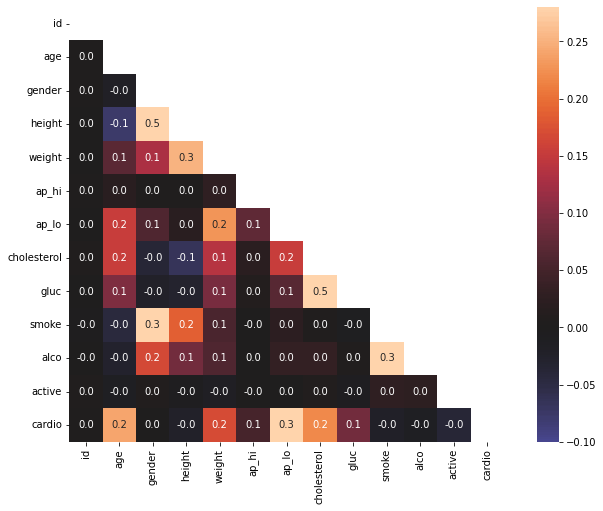

In [188]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt=".1f", center=0.0, vmin=-0.1, vmax=0.28)